In [94]:
# Date: 1-04-2020
# Author: Redouane Lguensat and Lamia Skalli 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
from scipy.special import erf
%matplotlib inline

In [2]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,40,74,84,94,110,110,120,170,174,237
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,230,264,302,367,409,454,511,584,716,847
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,133,164,188,224,267,308,334,370,376,390
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,7,8


# Morocco

In [4]:
df_confirmed[df_confirmed['Country/Region']=='Morocco'].loc[:,'3/2/20':] #'3/2/20'

,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
163,1,1,1,2,2,2,2,2,3,5,...,143,170,225,275,345,402,479,556,617,654


#### draw the curves

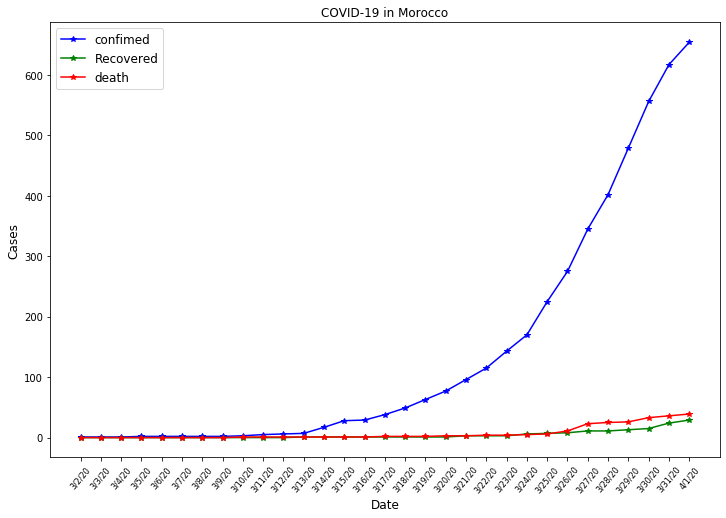

In [7]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=50,size=8)
plt.plot(list(df_confirmed)[44:],df_confirmed[df_confirmed['Country/Region']=='Morocco'].loc[:, '3/2/20':].values[0,:], '*-',color='blue')
plt.plot(list(df_recovered)[44:],df_recovered[df_recovered['Country/Region']=='Morocco'].loc[:, '3/2/20':].values[0,:], '*-',color='green')
plt.plot(list(df_deaths)[44:],df_deaths[df_deaths['Country/Region']=='Morocco'].loc[:, '3/2/20':].values[0,:], '*-', color='red')
plt.legend(['confimed','Recovered','death'],fontsize=12)
plt.title('COVID-19 in Morocco')
plt.xlabel('Date',size=12)
plt.ylabel('Cases',size=12)
#plt.style.use('dark_background')
plt.show()

# 7-day forecast of COVID-19 infections in Morocco

At this time, data is still scarce and not suitable for accurate modeling, these results are then highly uncertain for now.

### Fit an exponential curve (worst case, not realistic)

population is finite thus an exponential model is not realistic but gives insights about the beggining of an infection

#### function to extend dates

In [8]:
from datetime import timedelta, datetime
## https://github.com/Lewuathe/COVID19-SIR/blob/master/solver.py
def extend_index(index, new_size):
    values = index.values
    current = datetime.strptime(index[-1], '%m/%d/%y')
    while len(values) < new_size:
        current = current + timedelta(days=1)
        values = np.append(values, datetime.strftime(current, '%m/%d/%y'))
    return values

In [9]:
dataConfirmedMorocco = df_confirmed[df_confirmed['Country/Region']=='Morocco'].loc[:, '3/2/20':].iloc[0]
dataRecoveredMorocco = df_recovered[df_recovered['Country/Region']=='Morocco'].loc[:, '3/2/20':].iloc[0]
dataDeathMorocco = df_deaths[df_deaths['Country/Region']=='Morocco'].loc[:, '3/2/20':].iloc[0]

In [10]:
nbdays = (datetime.today() - datetime.strptime('3/2/20', '%m/%d/%y')).days + 1  #nbdays of available data from 3/2/20


#### curve fitting

In [11]:

U,V = curve_fit(lambda t,a,b,c: a*np.exp(b*t)+c,
                np.arange(1,nbdays),
                dataConfirmedMorocco)

In [12]:
U, V

(array([  6.08465315,   0.15473353, -22.13474807]),
 array([[ 1.67899036e+00, -9.03417255e-03, -7.81899259e+00],
        [-9.03417255e-03,  4.89849009e-05,  4.05143698e-02],
        [-7.81899259e+00,  4.05143698e-02,  5.63338389e+01]]))

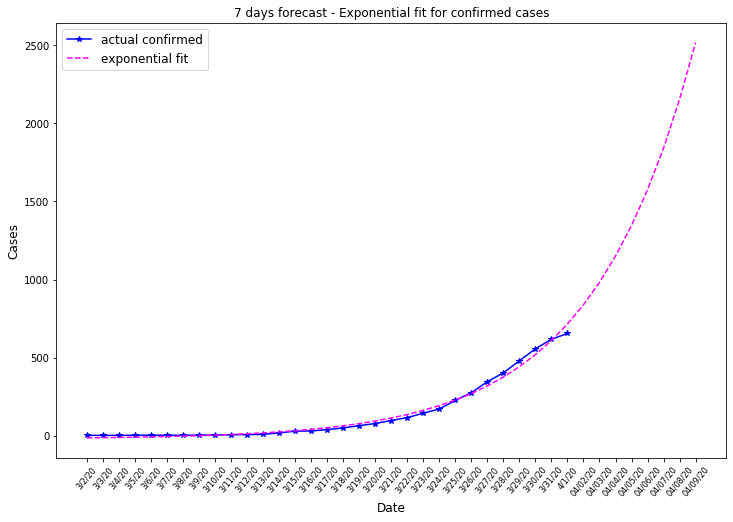

In [13]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=50,size=8)
plt.plot(list(df_confirmed)[44:],df_confirmed[df_confirmed['Country/Region']=='Morocco'].loc[:, '3/2/20':].values[0,:], '*-',color='blue')
plt.plot(extend_index(dataConfirmedMorocco.index,nbdays+7),U[0]*np.exp(U[1]*np.arange(1,nbdays+8))+U[2], '--',color='magenta')
plt.legend(['actual confirmed','exponential fit'],fontsize=12)
plt.title('7 days forecast - Exponential fit for confirmed cases')
plt.xlabel('Date',size=12)
plt.ylabel('Cases',size=12)
#plt.style.use('dark_background')
plt.show()

#### prediction for the next 7 days

In [14]:
np.floor(U[0]*np.exp(U[1]*np.arange(nbdays,nbdays+7))+U[2])

array([ 838.,  982., 1150., 1346., 1575., 1842., 2154.])

### Fit a logisitic curve (more realistic)

This model is widely used for estimating the growth of a population and also to simply model infections

In [15]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(a*x+b)))

In [16]:
nbdays = (datetime.today() - datetime.strptime('3/2/20', '%m/%d/%y')).days + 1  #nbdays of available data from 3/2/20

U,V = curve_fit(logistic_model,
          np.arange(1,nbdays),
          dataConfirmedMorocco,
          p0=[2,-60,10000])#p0=[2,-60,1000]

In [17]:
U,V

(array([ 2.76560534e-01, -7.82651923e+00,  9.87568724e+02]),
 array([[ 5.83568355e-05, -1.05050748e-03, -2.69068308e-01],
        [-1.05050748e-03,  2.00484004e-02,  4.30396725e+00],
        [-2.69068308e-01,  4.30396725e+00,  1.52221567e+03]]))

#### !!!!!!!!!!!!!! data is not sufficient to find a good logistic fit... 

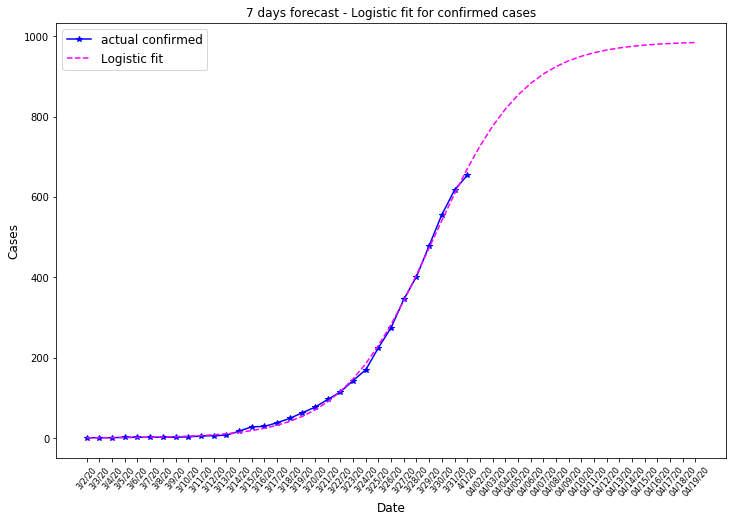

In [18]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=50,size=8)
plt.plot(list(df_confirmed)[44:],df_confirmed[df_confirmed['Country/Region']=='Morocco'].loc[:, '3/2/20':].values[0,:], '*-',color='blue')
plt.plot(extend_index(dataConfirmedMorocco.index,nbdays+17),U[2]/(1+np.exp(-(U[0]*np.arange(1,nbdays+18)+U[1]))), '--',color='magenta')
plt.legend(['actual confirmed','Logistic fit'],fontsize=12)
plt.title('7 days forecast - Logistic fit for confirmed cases')
plt.xlabel('Date',size=12)
plt.ylabel('Cases',size=12)
#plt.style.use('dark_background')
plt.show()

In [19]:
np.floor(U[2]/(1+np.exp(-(U[0]*np.arange(nbdays,nbdays+8)+U[1]))))

array([726., 776., 818., 853., 882., 905., 924., 938.])

somewhat similar to the exp curve for now (it's just the beginning in Morocco...)

# !!!! SIR model !!!!

#### Realistic model known to epidemiologists, check the excellent video by 3blue1brown https://www.youtube.com/watch?v=gxAaO2rsdIs

### Now let's find the best $\beta$ and $\gamma$ for Morocco data

In [20]:
N=3e7

def loss(point, data, recovered, N, s_0, i_0, r_0):
    #https://github.com/Lewuathe/COVID19-SIR/blob/master/solver.py
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/N, beta*S*I/N-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [21]:
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

data = dataConfirmedMorocco - dataRecoveredMorocco - dataDeathMorocco
###
s_0 = 3e7 
i_0 = 1
r_0 = 0
###
result = minimize(loss, [0.001, 0.001], args=(data.astype('float64'), dataRecoveredMorocco.astype('float64'), N, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0., 1), (0., 1)], options={'disp':10})#, bounds=[(0.00000001, 0.4), (0.00000001, 0.4)]
beta, gamma = result.x
print(beta,gamma,beta/gamma)

0.2277066501223455 0.00860659679052292 26.45722294938723


In [22]:
def SIR(t, y):
    S = y[0]
    I = y[1]
    R = y[2]
    return [-beta*S*I/N, beta*S*I/N-gamma*I, gamma*I]

In [23]:
predict_range = nbdays + 150

new_index = extend_index(dataConfirmedMorocco.index, predict_range)
size = len(new_index)

predictMorocco = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

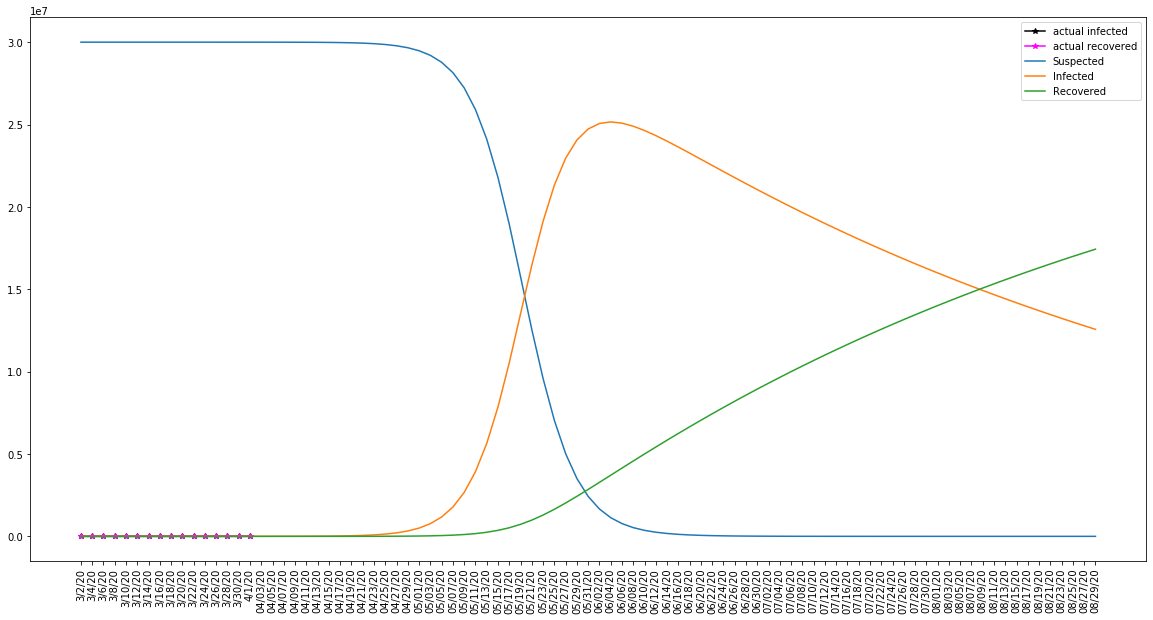

In [24]:
infected_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
recovered_actual = np.concatenate((dataRecoveredMorocco.values, [None] * (size - len(data.values))))

plt.figure(figsize=(20,10))
plt.plot(new_index[::2], infected_actual[::2], '*-',color='black', label='actual infected')
plt.plot(new_index[::2], recovered_actual[::2], '*-',color='magenta', label='actual recovered')
plt.plot(new_index[::2], predictMorocco.y[0,::2], label='Suspected')
plt.plot(new_index[::2], predictMorocco.y[1,::2], label='Infected')
plt.plot(new_index[::2], predictMorocco.y[2,::2], label='Recovered')
plt.xticks(rotation=90)
plt.legend()

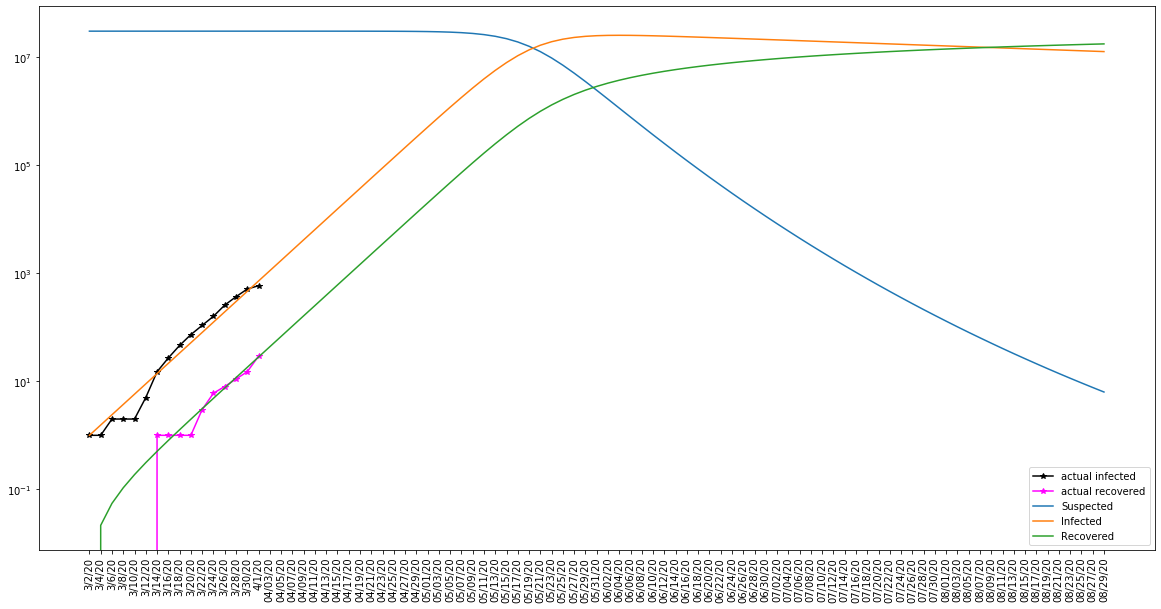

In [25]:

plt.figure(figsize=(20,10))
plt.semilogy(new_index[::2], infected_actual[::2], '*-',color='black', label='actual infected')
plt.semilogy(new_index[::2], recovered_actual[::2], '*-',color='magenta', label='actual recovered')
plt.semilogy(new_index[::2], predictMorocco.y[0,::2], label='Suspected')
plt.semilogy(new_index[::2], predictMorocco.y[1,::2], label='Infected')
plt.semilogy(new_index[::2], predictMorocco.y[2,::2], label='Recovered')
plt.xticks(rotation=90)
plt.legend()

# !!!! SEIR model !!!!

In [26]:
def lossSEIR(point, data, recovered, N, s_0, e_0, i_0, r_0):
    #https://github.com/Lewuathe/COVID19-SIR/blob/master/solver.py
    size = len(data)
    alpha, beta, gamma = point
    def SEIR(t, y):
        S = y[0]
        E = y[1]
        I = y[2]
        R = y[3]
        return [-beta*S*I/N, beta*S*I/N - alpha*E, alpha*E - gamma*I, gamma*I]
    solution = solve_ivp(SEIR, [0, size], [s_0,e_0,i_0,r_0],
                         t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[2] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[3] - recovered)**2))
    alpha = 0.5
    #print(l1,l2, alpha * l1 + (1 - alpha) * l2)
    return alpha * l1 + (1 - alpha) * l2

In [27]:
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

data = dataConfirmedMorocco - dataRecoveredMorocco - dataDeathMorocco
###
s_0 = 3e7-101
e_0 = 100
i_0 = 1
r_0 = 0
###
result = minimize(lossSEIR,
                  [0.1,0.1,0.1],
                  args=(data.astype('float64'), dataRecoveredMorocco.astype('float64'), N, s_0, e_0, i_0, r_0),
                  method='L-BFGS-B',
                  bounds=[(0., 5.), (0., 10.), (0., 5.)])#, bounds=[(0.00000001, 0.4), (0.00000001, 0.4)]
alpha, beta, gamma = result.x
print(alpha, beta, gamma, beta/gamma)

0.01366648408582494 2.2934917936036867 0.006471922579332597 354.3756535233767


In [28]:
def SEIR(t, y):
    S = y[0]
    E = y[1]
    I = y[2]
    R = y[3]
    return [- beta*S*I/N, beta*S*I/N - alpha*E, alpha*E - gamma*I, gamma*I]

In [29]:
predict_range = nbdays + 120

new_index = extend_index(dataConfirmedMorocco.index, predict_range)
size = len(new_index)

predictMorocco = solve_ivp(SEIR,
                           [0, size],
                           [s_0,e_0,i_0,r_0],
                           t_eval=np.arange(0, size, 1))

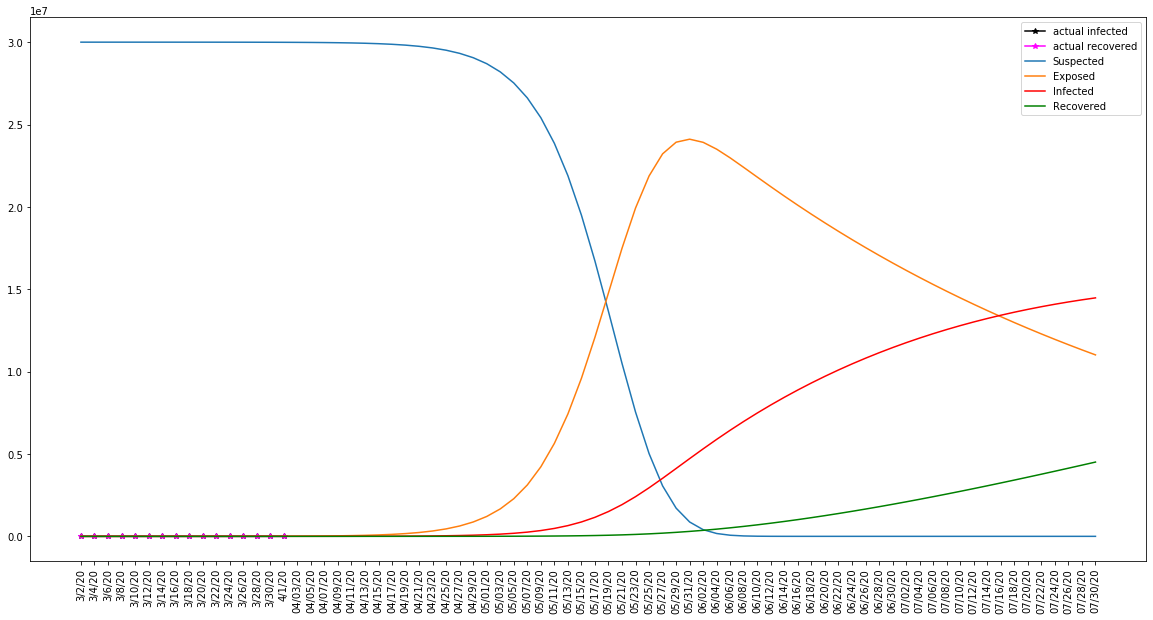

In [30]:
infected_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
recovered_actual = np.concatenate((dataRecoveredMorocco.values, [None] * (size - len(data.values))))

plt.figure(figsize=(20,10))
plt.plot(new_index[::2], infected_actual[::2], '*-',color='black', label='actual infected')
plt.plot(new_index[::2], recovered_actual[::2], '*-',color='magenta', label='actual recovered')
plt.plot(new_index[::2], predictMorocco.y[0,::2], label='Suspected')
plt.plot(new_index[::2], predictMorocco.y[1,::2], label='Exposed')
plt.plot(new_index[::2], predictMorocco.y[2,::2], label='Infected', color='red')
plt.plot(new_index[::2], predictMorocco.y[3,::2], label='Recovered', color='green')
plt.xticks(rotation=90)
plt.legend()

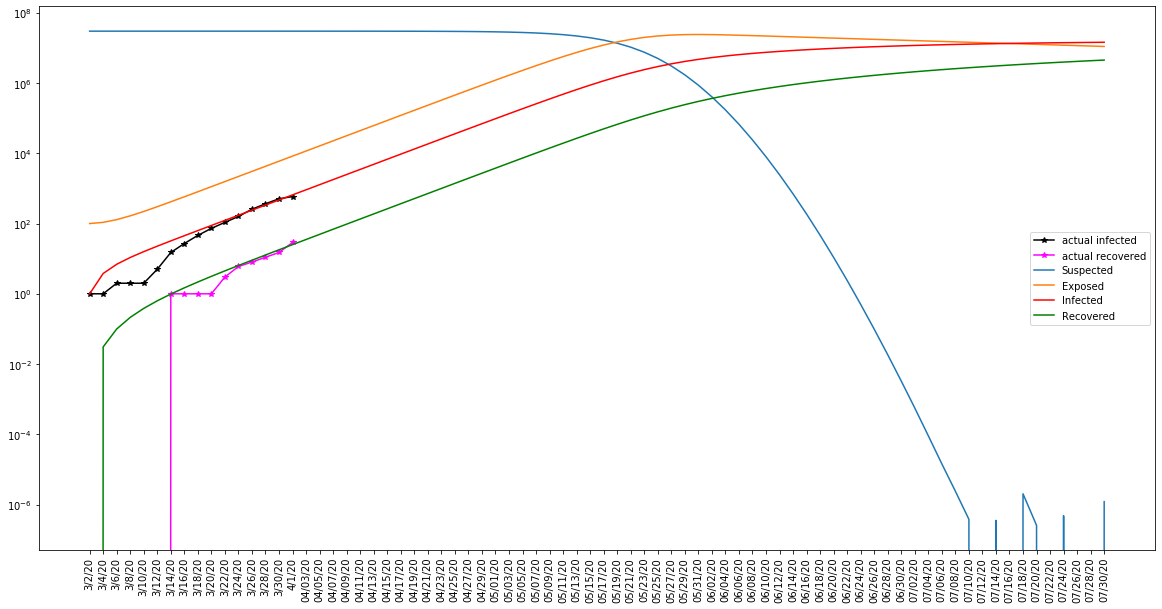

In [31]:

plt.figure(figsize=(20,10))
plt.semilogy(new_index[::2], infected_actual[::2], '*-',color='black', label='actual infected')
plt.semilogy(new_index[::2], recovered_actual[::2], '*-',color='magenta', label='actual recovered')
plt.semilogy(new_index[::2], predictMorocco.y[0,::2], label='Suspected')
plt.semilogy(new_index[::2], predictMorocco.y[1,::2], label='Exposed')
plt.semilogy(new_index[::2], predictMorocco.y[2,::2], label='Infected', color='red')
plt.semilogy(new_index[::2], predictMorocco.y[3,::2], label='Recovered', color='green')
plt.xticks(rotation=90)
plt.legend()

In [32]:
np.max(predictMorocco.y[2,:])

14531781.709189339

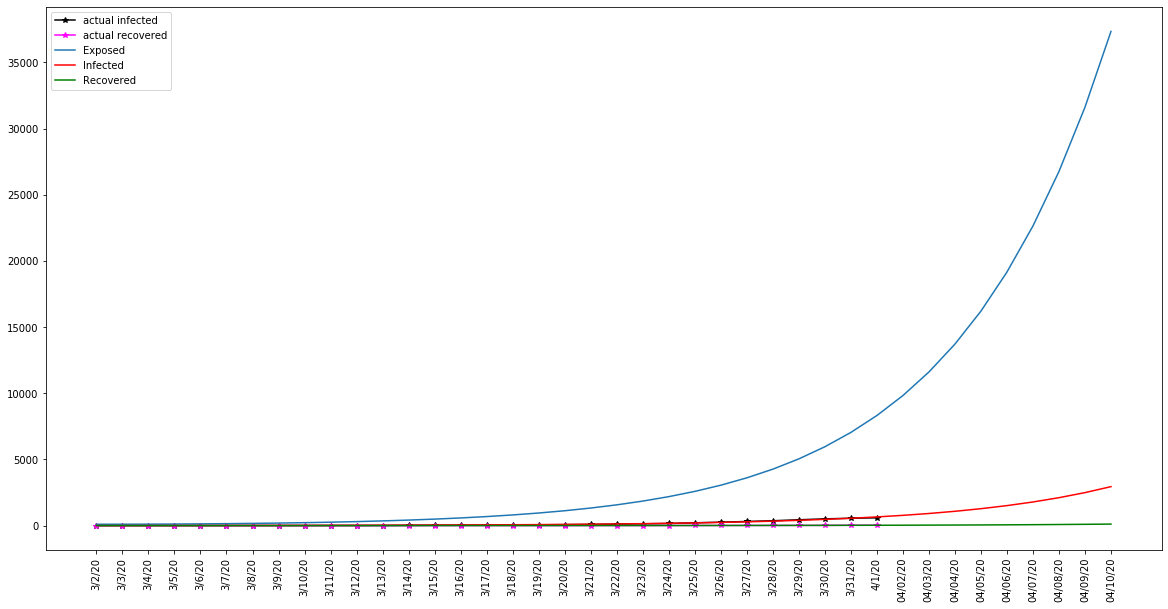

In [33]:
plt.figure(figsize=(20,10))
plt.plot(new_index[:40], infected_actual[:40], '*-',color='black', label='actual infected')
plt.plot(new_index[:40], recovered_actual[:40], '*-',color='magenta', label='actual recovered')
#plt.plot(new_index[:20], predictMorocco.y[0,:20], label='Suspected')
plt.plot(new_index[:40], predictMorocco.y[1,:40], label='Exposed')
plt.plot(new_index[:40], predictMorocco.y[2,:40], label='Infected', color='red')
plt.plot(new_index[:40], predictMorocco.y[3,:40], label='Recovered', color='green')
plt.xticks(rotation=90)
plt.legend()

### Other test for the initialisation

SEIR model used with initial parameters : 
S0 = 3e7-1
E0 = 0
I0 = 1
R0 = 0
Day 1 is the first case confirmed in Morocco

In [34]:

s_0 = 3e7-1
e_0 = 0
i_0 = 1
r_0 = 0

result = minimize(lossSEIR,
                  [0.1,0.1,0.1],
                  args=(data.astype('float64'), dataRecoveredMorocco.astype('float64'), N, s_0, e_0, i_0, r_0),
                  method='L-BFGS-B',
                  bounds=[(0., 5.), (0., 10.), (0., 5.)])#, bounds=[(0.00000001, 0.4), (0.00000001, 0.4)]
alpha, beta, gamma = result.x
print(alpha, beta, gamma, beta/gamma)

1.944214314618988 0.25784256464362854 0.00875446965995606 29.452676707879835


In [35]:
def SEIR(t, y):
    S = y[0]
    E = y[1]
    I = y[2]
    R = y[3]
    return [- beta*S*I/N, beta*S*I/N - alpha*E, alpha*E - gamma*I, gamma*I]

predict_range = nbdays + 120

new_index = extend_index(dataConfirmedMorocco.index, predict_range)
size = len(new_index)

predictMorocco = solve_ivp(SEIR,
                           [0, size],
                           [s_0,e_0,i_0,r_0],
                           t_eval=np.arange(0, size, 1))

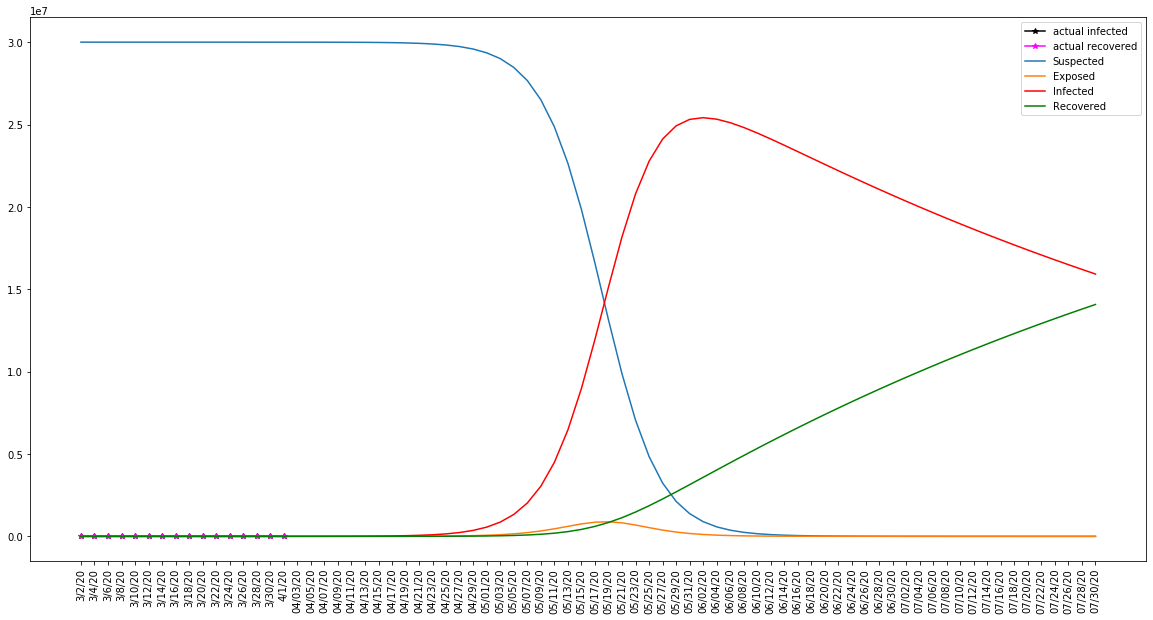

In [36]:
infected_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
recovered_actual = np.concatenate((dataRecoveredMorocco.values, [None] * (size - len(data.values))))

plt.figure(figsize=(20,10))
plt.plot(new_index[::2], infected_actual[::2], '*-',color='black', label='actual infected')
plt.plot(new_index[::2], recovered_actual[::2], '*-',color='magenta', label='actual recovered')
plt.plot(new_index[::2], predictMorocco.y[0,::2], label='Suspected')
plt.plot(new_index[::2], predictMorocco.y[1,::2], label='Exposed')
plt.plot(new_index[::2], predictMorocco.y[2,::2], label='Infected', color='red')
plt.plot(new_index[::2], predictMorocco.y[3,::2], label='Recovered', color='green')
plt.xticks(rotation=90)
plt.legend()

The optimization of the SEIR gives : 
alpha = 0.2650205887396011 
beta = 0.4721287661143863 
gamma = 0.012092698277615836
r0 = 39.04246639381711


## Now we want to compare the model to the real data and try to approach the model to reality.

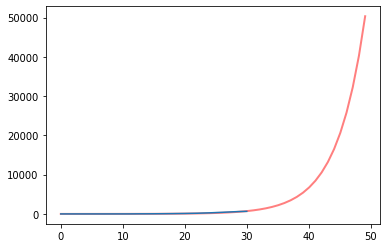

In [41]:
confirmed = list(dataConfirmedMorocco)
index0=sorted(list(np.where(np.array(confirmed)==0)[0]),reverse=True)
for i in index0:
    del confirmed[i]

from scipy.integrate import odeint
import matplotlib.pyplot as plt

# The SIR model differential equations.
def deriv(y, t,beta,alpha, gamma):
    N=34470000
    S, E,I, R = y
    dSdt = -beta*S*I/N
    dEdt=beta*S*I/N - alpha*E
    dIdt = alpha*E - gamma*I
    dRdt = gamma * I
    return dSdt, dEdt,dIdt, dRdt

# A grid of time points (in days)
t = np.linspace(0, 500, 500)
I0 = 1
E0 = 0
S0 = 34470000-1
R0 = 0

# Initial conditions vector
y0 = S0,E0, I0, R0
beta=beta
alpha=alpha
gamma=gamma


ret = odeint(deriv, y0, t, args=( beta,alpha, gamma))
S,E, I, R = ret.T

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t[0:50], I[0:50], 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(range(len(confirmed)),confirmed)
plt.show()



#### Here in blue the confirmed cases in Morocco and in red the SEIR model since day0 (1 case confirmed)

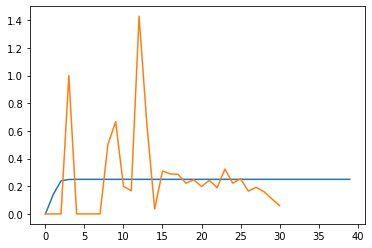

In [42]:
def tauxCroissance(x):
    n= len(x)
    taux=[0]
    for i in range(n):
        if i>0 : 
            if x[i-1]>0:
                taux += [round((x[i]-x[i-1])/x[i-1],3)]
            else : 
                taux+=[0]
    return(taux)

tauxEstimation = tauxCroissance(I)
tauxReel = tauxCroissance(confirmed)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(range(40),tauxEstimation[0:40])
ax.plot(range(len(tauxReel)),tauxReel)
plt.show()

#### In blue we plot the Increasing rate of SEIR model, in orange the Increasing rate of the real data. We can observe that from a stabilized point (day0 +15 days) the increasing rate of the actual data decrease more significatly. 

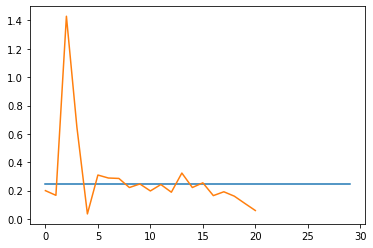

In [43]:
tauxEstimation = tauxCroissance(I)
tauxReel = tauxCroissance(confirmed)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(range(30),tauxEstimation[10:40])
ax.plot(range(len(tauxReel)-10),tauxReel[10:])
plt.show()

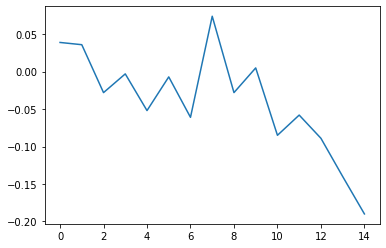

In [44]:
errorTaux = np.array(tauxCroissance(confirmed)[16:])-np.array(tauxCroissance(I)[16:len(confirmed)])
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(range(len(errorTaux)),errorTaux)
plt.show()


#### We plot here the error from the confirmed cases and the estimated cases from the SEIR. The error seems increasing in absolute value and seems following an ARIMA.

## ARIMA

/Users/apple/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


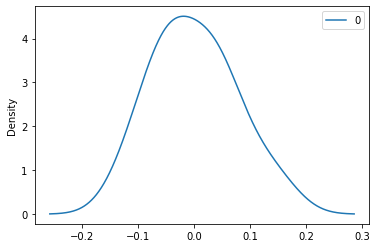

               0
count  15.000000
mean   -0.000221
std     0.074443
min    -0.122008
25%    -0.047500
50%    -0.011005
75%     0.044218
max     0.150000


In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf

data = errorTaux

# fit model
model = SARIMAX(data, order=(2, 3, 0), seasonal_order=(0, 0, 0,0))
model_fit = model.fit(disp=False)
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

We fit an ARIMA(2,3,0) and plot the residuals. We obbserd that the residuals follow a normal distribution with mean close to 0

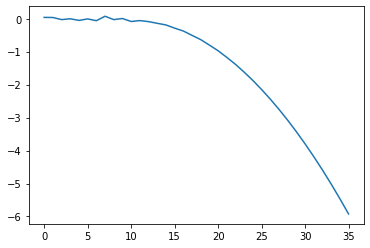

In [46]:
#Forecasting
yhat = list(errorTaux)+list(model_fit.predict(len(data), len(data)+20))
    

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(range(len(yhat)),yhat)
plt.show()

#### We plot here the forecasting from our ARIMA model. 

#### Thanks to our forecasting, we can go back to the increasing rate from the SEIR model to correct it, and then go back to the prediction of the confirmed cases. 

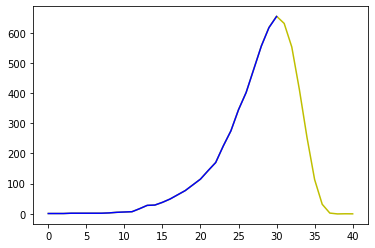

In [47]:
def backToCases(x0,taux):
    n= len(taux)
    cases=[]
    x=x0
    for i in range(n-1):
        cases+=[round(x*(1+taux[i+1]),2)]
        x=round(x*(1+taux[i+1]),2)
   
    return(cases)
    

tauxCorrected = list(np.array(tauxCroissance(I)[16:len(confirmed)+21])+np.array(yhat))[:25]
predictionAndHistory=confirmed[:17]+backToCases(confirmed[16],tauxCorrected)

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(range(len(predictionAndHistory)),predictionAndHistory,'y')
ax.plot(range(len(confirmed)),confirmed,'b')
plt.show()

#### We plot in blue the real data and in yellow the forecasting